In [5]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt
import seaborn as sns

### Data preparation

#### Load data

In [6]:
data = pd.read_csv('insurance.csv', header = 0, encoding='utf8')

#### Explore data

In [7]:
data.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [8]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [9]:
data.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


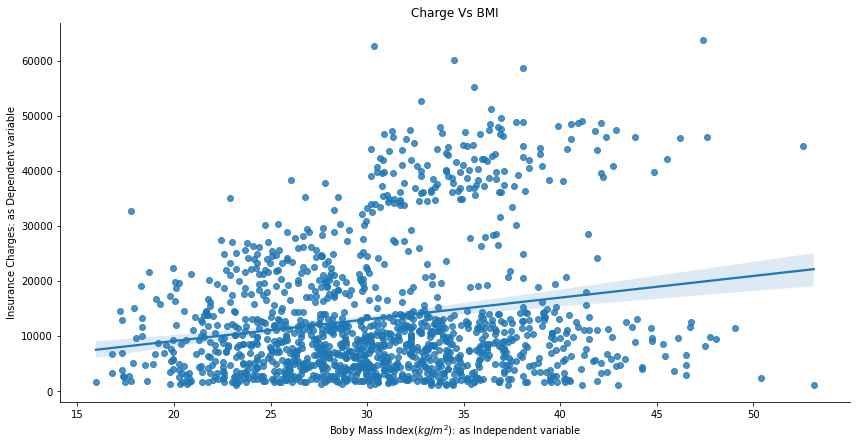

In [10]:
sns.lmplot(x='bmi',y='charges',data=data,aspect=2,height=6)
plt.xlabel('Boby Mass Index$(kg/m^2)$: as Independent variable')
plt.ylabel('Insurance Charges: as Dependent variable')
plt.title('Charge Vs BMI');

In [11]:
# Count missing values if exists
contain_null = np.array(data.isnull().sum().to_frame()[data.isnull().sum().to_frame()[0]!=0].index)
contain_null

array([], dtype=object)

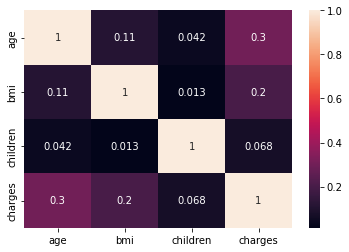

In [12]:
# Correlation plot
corr = data.corr()
sns.heatmap(corr, annot= True);

### Data Preprocessing

#### One-hot encode categorical features

nếu như cứ sử dụng ánh xạ để encode (vd: gán HN = 1, ĐN = 2) thì ta sẽ vô tình khiến ĐN > HN

In [13]:
# Dummy variable
categorical_columns = ['sex','children', 'smoker', 'region']
df_encode = pd.get_dummies(data = data, prefix = 'OHE', prefix_sep='_',
               columns = categorical_columns,
               drop_first =True,
              dtype='int8')

In [14]:
df_encode.head()

,age,bmi,charges,OHE_male,OHE_1,OHE_2,OHE_3,OHE_4,OHE_5,OHE_yes,OHE_northwest,OHE_southeast,OHE_southwest
0,19,27.900,16884.92400,0,0,0,0,0,0,1,0,0,1
1,18,33.770,1725.55230,1,1,0,0,0,0,0,0,1,0
2,28,33.000,4449.46200,1,0,0,1,0,0,0,0,1,0
3,33,22.705,21984.47061,1,0,0,0,0,0,0,1,0,0
4,32,28.880,3866.85520,1,0,0,0,0,0,0,1,0,0


#### Split train/test dataset

In [15]:
X = df_encode.drop('charges',axis=1) # Independent variables
y = df_encode['charges'] # Dependent variable

In [16]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20, random_state = 103)

### Model development

https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html

#### Train Linear Regression model

In [17]:
clf = LinearRegression(fit_intercept=True)
clf.fit(X_train, y_train)

LinearRegression()

#### Predict on Test set

In [18]:
y_pred = clf.predict(X_test)

#### Evaluate Linear Regression model

In [19]:
# MSE
mse = mean_squared_error(y_pred, y_test)
print('The Mean Square Error(MSE) is: ',mse)
# R_square
R_square = clf.score(X_test,y_test)
print('R square is :',R_square)

The Mean Square Error(MSE) is:  36353019.04186413
R square is : 0.7894651538200016
